In [21]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the uploaded csv file
df = pl.read_csv("Development of average annual wages.csv")

In [5]:
# Get the # of rows and columns of the dataframe
rows = df.shape[0]
columns = df.shape[1]

In [11]:
# Convert columns to float
def str_to_float(s):
    return float(s.replace(",", ""))

df = df.select([
    "*",
    df["2000"].apply(str_to_float, return_dtype=pl.Float64).alias("2000_float"),
    df["2010"].apply(str_to_float, return_dtype=pl.Float64).alias("2010_float"),
    df["2020"].apply(str_to_float, return_dtype=pl.Float64).alias("2020_float"),
    df["2022"].apply(str_to_float, return_dtype=pl.Float64).alias("2022_float"),
])


In [13]:
# Top 3 countries with 2022 average annual wages
top_3_countries = df.sort(by="2022_float").reverse().slice(0, 3)

In [26]:
# Calculate the median for the 2022 numbers
median = df["2022_float"].median()
median

50564.5

In [27]:
# Calculate the mean for the 2022 numbers
mean = df["2022_float"].mean()
mean

49685.529411764706

In [30]:
# Calculate the standard deviation for the 2022 numbers
std_2022 = df["2022_float"].std()
std_2022

15794.866072768218

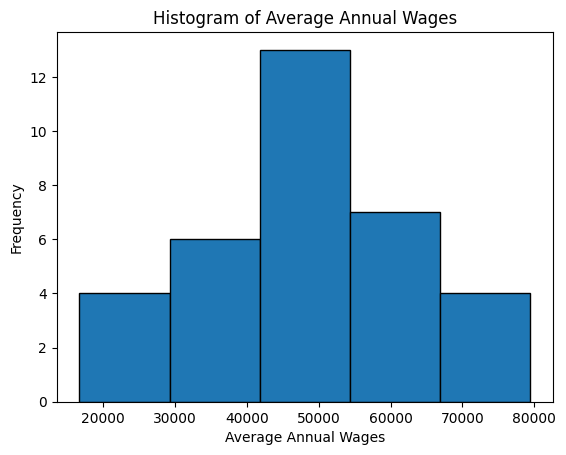

In [32]:
# Plot a histogram for the 2022 numbers
data = df['2022_float']

# Create histogram
plt.hist(data, bins=5, edgecolor="k")

# Add labels and title
plt.xlabel('Average Annual Wages')
plt.ylabel('Frequency')
plt.title('Histogram of Average Annual Wages')

# Show plot
plt.show()

In [33]:
# Calculate the mean for every year's data
mean_2000 = df["2000_float"].mean()
mean_2010 = df["2010_float"].mean()
mean_2020 = df["2020_float"].mean()
mean_2022 = df["2022_float"].mean()
means = [mean_2000, mean_2010, mean_2020, mean_2022]

<function matplotlib.pyplot.show(close=None, block=None)>

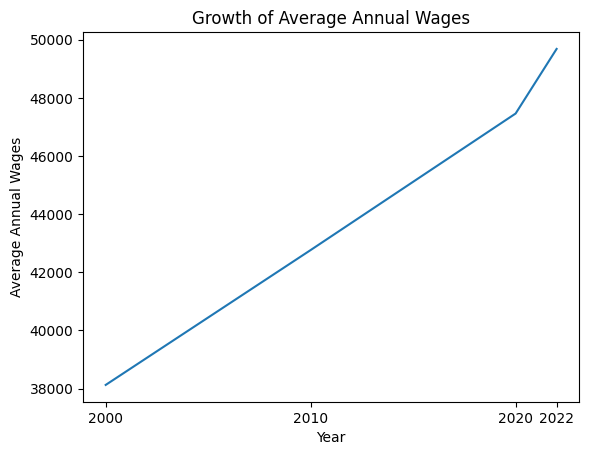

In [34]:
years = [2000, 2010, 2020, 2022]

# Plot the growth of the average number
plt.plot(years, means)

# Add labels and title
plt.xlabel('Year')
plt.xticks(ticks = years, labels = ['2000', '2010', '2020', '2022'])
plt.ylabel('Average Annual Wages')
plt.title('Growth of Average Annual Wages')
plt.show